In [1]:
#importing libraries
import requests #download data
import numpy as np #array functions
import pandas as pd #data handling
import tweepy #twitter api
import json #handle json data
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import re #text processing
import os#operating system

## Data Gathering

#### Twitter Archive (twitter-archive-enhanced.csv)

In [2]:
# I downloaded the file from Udacity. Now the file can be loaded directly into a dataframe via Pandas.
df_twitter = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#load info
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tweet image predictions (image_predictions.tsv)
The tweet image predictions, i.e what breed of dog (or other object, animal, etc.) is present in each tweet. This file (image_predictions.tsv) is hosted on Udacity's servers and downloaded using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
# downloading the image-prediction-file using the url from udacity servers.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

the above output response [200] sates that response has sucessfully excutted

In [5]:
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images),mode='wb') as file:
    file.write(response.content)

In [6]:
#prediction file load
prediction_file = pd.read_csv(file_images, sep='\\t',engine='python')
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
#prediction file data load
prediction_file.head()#sample of the image prediction file

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Download tweet Jason data

To gather the data from the Twitter API,using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. This results in a new file called "tweet_json.txt".

### save the gathered data to a file

with open("tweet_json.txt", "w") as file: for ids in twitter_ids: print(f"Gather id: {ids}") try:

        #get all the twitter status - extended mode gives us additional data
        tweet = api.get_status(ids, tweet_mode = "extended")
        #dump the json data to our file
        json.dump(tweet._json, file)
        #add a linebreak after each dump
        file.write('\n')
    except Exception as e:
        print(f"Error - id: {ids}" + str(e))

Now we can read in all the necessary data into a dictionary to create a dataframe.

In [8]:
#downloading the Data using twitter API

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
#access the api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
                            

In [9]:
#https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10
api_data = []

#read the created file
with open("tweet-json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
            #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.") 
            
df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


In [10]:
#load data
df_twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#load prediction data
prediction_file.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
#load aoi data
df_api.head(5)

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


In [13]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
retweeted             2354 non-null bool
display_text_range    2354 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


### Assessing Data
After gathering all files, stored their data into a dataframe for easier assessment and cleaning. In order to assess the data, I examined it visually and programatically using python's pandas library. First, I printed out all the dataframes entirely, used the info() function to assess the datatypes, used describe() function to summarise the quantitative variables in the datasets, etc. Then i examined the dataframes more specifically by examining each variable separately and found out the following issues.and 
Now we are going to look for issues with the quality or the tidiness of the data and its dimensions.

#### df_twitter
Let's first look for missing data.

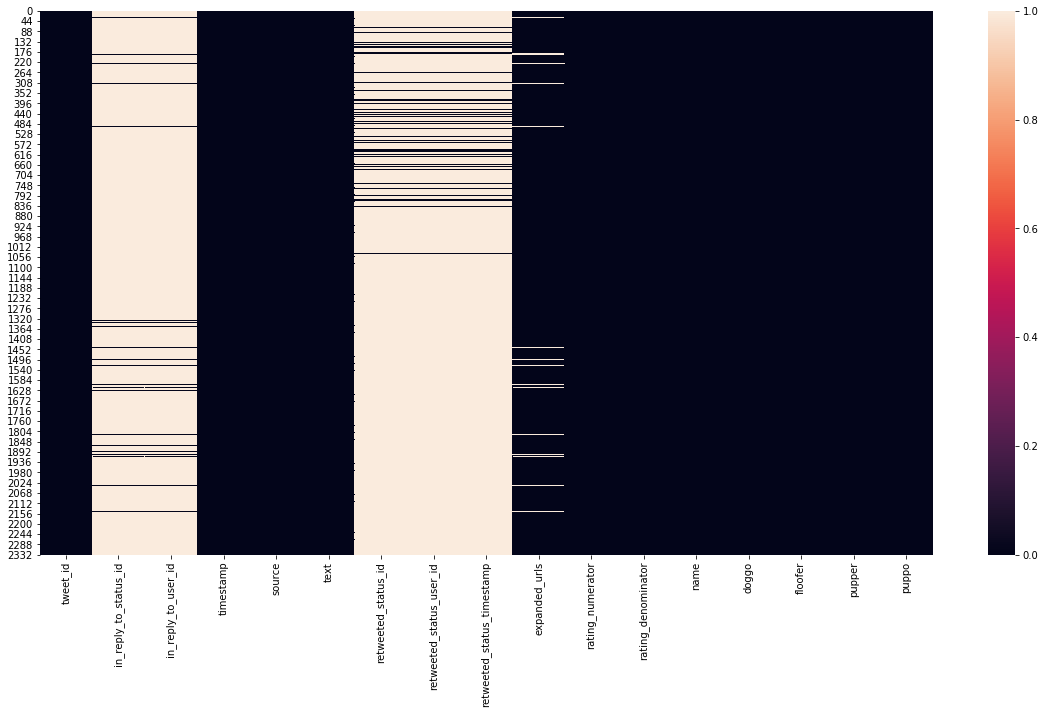

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(df_twitter.isnull(), vmin=0, vmax = 1)

As we can see, there is a lot of missing data in the columns about the reply and the retweeted status. Since we only want original posts with images, we have to drop them later - the missing data in the "expanded_urls" column will also disappear with that cleaning operation.

In [15]:
#load the sample data
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,363890752.0,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None
620,796125600683540480,NaN,NaN,2016-11-08 23:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,NaN,NaN,https://twitter.com/king5seattle/status/796123...,13,10,None,None,None,None,None
1711,680497766108381184,NaN,NaN,2015-12-25 21:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Percy. He's a Latvian Yuletide Heineken. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680497766...,12,10,Percy,None,None,None,None


### During the visual assessment we can observe that:

a) not all tweets could be classified as doggo, floofer, pupper or puppo and all columns contain "None"

b) the source contains unnecessary HTML code

c) there is the name "None" in the name column

In [16]:
#load info
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Also the datatypes are incorrect:

>tweet_id should be a str

>timestamp - columns should be datetime objects

Now let's see how many wrong names we can find.

In [17]:
df_twitter.name.value_counts()


None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Brandi         1
Ron            1
Alexander      1
Severus        1
Jazz           1
Name: name, Length: 957, dtype: int64

>As we can see, the name column contains wrong names like "None", "a", "the", "an".

In [18]:
#load the duplicate 
df_twitter[df_twitter.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no duplicates in this data, so the number of unique tweet_ids should be the length of the df.

In [19]:
#load unique data
df_twitter.tweet_id.nunique()

2356

Now create a copy of the twitter dataframe for further assessing. I want to see in how many cases there were no classification of dog_size possible via text processing.

In [20]:
df_twitter_assess = df_twitter.copy()

In [21]:
#returns true if there is no dog classification in any of the columns
df_twitter_assess[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False     380
dtype: int64

In [22]:
df_twitter_assess["doggo"].value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [23]:
df_twitter_assess["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [24]:
df_twitter_assess["pupper"].value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
df_twitter_assess["puppo"].value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

In [26]:
#here upload twitter rating numerator
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

We can observe that there is a wide range of numbers as rating_numerator, with a maximum of 1776.

In [27]:
print(df_twitter.query("rating_numerator == '1776'").text)

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object


This rating is correct - so a lot higher values as 12 or 13 would be valid to this rating system. But what is with the very small ones?

In [28]:
#for rating 1 value
print(df_twitter.query("rating_numerator == '1'").text)

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object


now we can check that entry shows 605 entry that don't contain any dogs and also in the entry of 2335 he rating got extracted wrongly (misinterpreted the 1/2 of 3 1/2 as the rating).

In [29]:
print(df_twitter.query("rating_numerator == '0'").text)

315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object


no clear doggo photo again , now let's check denominator

In [30]:
df_twitter.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
print(df_twitter.query("rating_denominator == '170'").text)


1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [32]:
print(df_twitter.query("rating_denominator == '0'").text)


313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [33]:
print(df_twitter.query("rating_denominator == '7'").text)


516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [34]:
# here we try to get pattern
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" #we could expect an integer rating on what we saw, but maybe some floats are the case

df_twitter_assess["rating"] = df_twitter_assess.text.str.extract(pattern, expand = True)[0]

df_twitter_assess[['num', 'denom']] = df_twitter_assess['rating'].str.split('/', n=1, expand=True)##

In [35]:
df_twitter_assess.rating_numerator = df_twitter_assess.rating_numerator.astype("str")
df_twitter_assess.rating_denominator = df_twitter_assess.rating_denominator.astype("str")

In [36]:
#look for differences in the original numerator and the newe extract
df_twitter_assess["check_num"] = df_twitter_assess[["rating_numerator", "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [37]:
df_twitter_assess.check_num.value_counts()

True     2349
False       7
Name: check_num, dtype: int64

In [38]:
#load data about rating _numirator and num,check_num
df_twitter_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


In [39]:
df_twitter_assess[["rating_numerator", "num", "check_num"]].sample(15)


,rating_numerator,num,check_num
583,11,11,True
1727,5,5,True
1167,11,11,True
685,13,13,True
1500,10,10,True
1371,11,11,True
1811,12,12,True
638,12,12,True
196,12,12,True
1343,13,13,True


In [40]:
df_twitter_assess["check_denom"] = df_twitter_assess[["rating_denominator", "denom"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [41]:
df_twitter_assess.check_denom.value_counts()


True     2355
False       1
Name: check_denom, dtype: int64

In [42]:
df_twitter_assess.query("check_denom == False")[["rating_denominator", "denom","check_denom"]] 
#problem with integer, maybe also floats?

,rating_denominator,denom,check_denom
313,0,00,False


it's seems like it is no problem .

In [43]:
df_twitter_assess[["rating_denominator", "denom", "check_denom"]].sample(5)


,rating_denominator,denom,check_denom
1048,10,10,True
2334,10,10,True
1392,10,10,True
695,10,10,True
1972,10,10,True


Now we should assess how often there are multiple occurences of the "rating pattern" in one tweet.

In [44]:
df_twitter_assess["count"] = df_twitter_assess.text.str.count(pattern)


In [45]:
df_twitter_assess["count"].value_counts()


1    2323
2      32
3       1
Name: count, dtype: int64

In [46]:
#show the full text
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)

df_twitter_assess[["text", "count"]].query("count != 1")


,text,count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2


We can see that:

this data contains retweets (as mentioned before)

sometimes there are multiple dogs/cats or else in one picture

some of these ratings are not clear

### df_predict

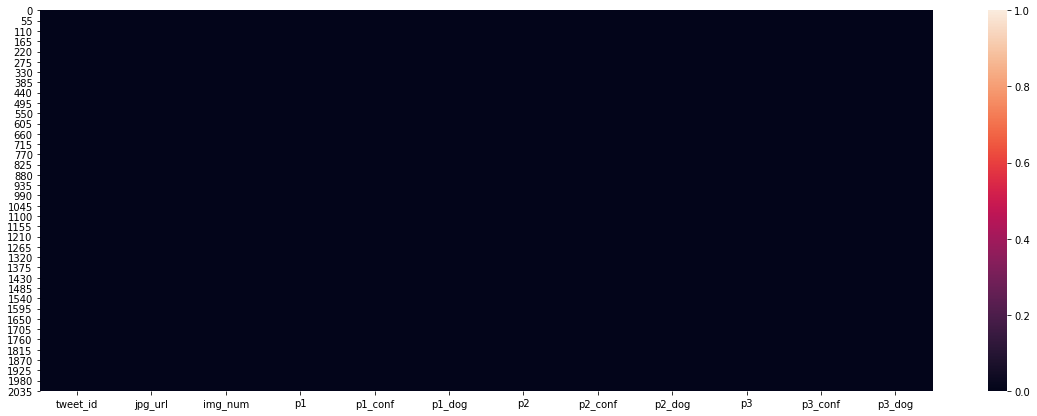

In [47]:

fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(prediction_file.isnull(), vmin = 0, vmax = 1)

it's look good 

In [48]:
#prediction file load
prediction_file.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
1263,749036806121881602,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,sulphur-crested_cockatoo,0.960276,False,West_Highland_white_terrier,0.019522,True,Samoyed,0.006396,True
1801,831939777352105988,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1348,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,True,Chesapeake_Bay_retriever,0.194251,True,Labrador_retriever,0.012225,True
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,pug,0.956565,True,swing,0.018907,False,toy_poodle,0.013544,True
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False


We can see that:

the predicitions are sometimes lowercase, sometimes uppercase

there is an underscore instead of a whitespace between the words

there are rows with no prediciton of a dog (neither in 1, 2 nor 3)

In [49]:
#prediction file load
prediction_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


here we check that the tweet_id column again is the str

try to find the duplicate use by jpg url file

In [50]:
#predict the jpg url
prediction_file.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg    2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg    2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg    2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg    2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg    2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg    2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg    2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg    2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg    2
Name: jpg_url, dtype: int64

As the shown data we can see that all this data contains retweets.

In [51]:
#identify the duplicate tweet_id
prediction_file[prediction_file.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [52]:
#here i used the jpg_url and predict the file and it shows the results
prediction_file[prediction_file.jpg_url == "https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True


In [53]:
#here i used "1045" tweet_id and it giving information about this tweet_id
df_twitter[df_twitter.tweet_id == 798697898615730177]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
596,798697898615730177,NaN,NaN,2016-11-16 01:23:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn,7.128090e+17,4.196984e+09,2016-03-24 01:11:29 +0000,"https://twitter.com/dog_rates/status/712809025985978368/photo/1,https://twitter.com/dog_rates/status/712809025985978368/photo/1",10,10,Stubert,None,None,None,None


Here i tried to find the Tweets with pictures which contain dogs. for which the ML - Algorithm didn't predict any dogs.

In [54]:
#here is the predition_file,this is 1st case i applied
prediction_file.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [55]:
#this is 2nd case
prediction_file.query("p1_dog == False and (p2_dog == True or p3_dog == True)")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True


After checking some of these pictures it gets clear, that sometimes the doggos are in the background or the pictures doesn't contain any dogs at all.


### df_api

Here again repeat the same pattern for this dataset: missing data → visual assessment(represantation)

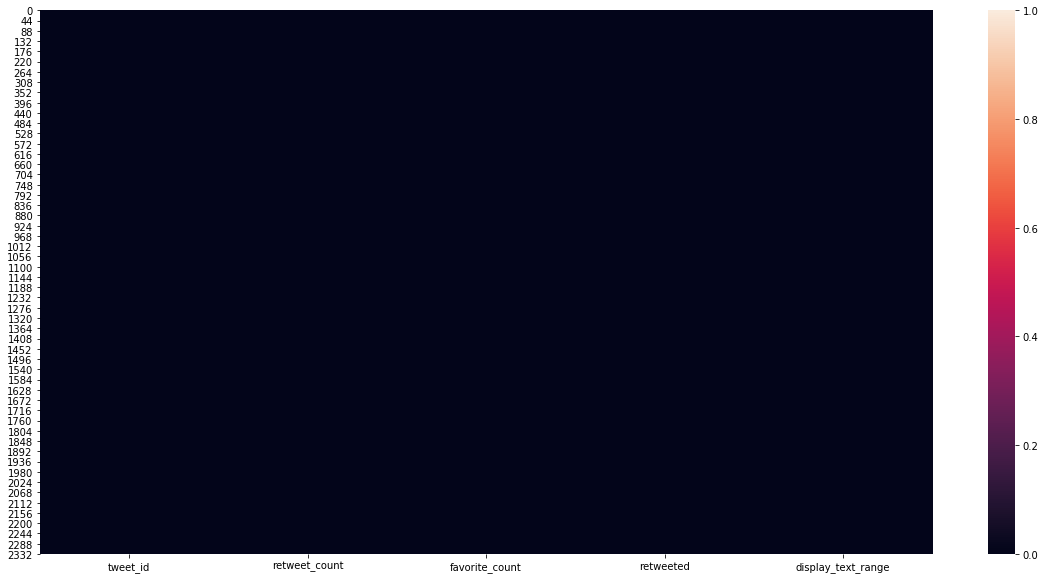

In [56]:

fig, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(df_api.isnull(), vmin = 0, vmax = 1)

it seems like it does not have any missing values

In [57]:
#Here is sample 
df_api.sample(10)

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
1607,685547936038666240,17465,35052,False,"[0, 98]"
1401,699413908797464576,688,2258,False,"[0, 138]"
1188,718234618122661888,1127,4217,False,"[0, 128]"
2213,668542336805281792,231,497,False,"[0, 140]"
1273,709179584944730112,763,2213,False,"[0, 83]"
635,793500921481273345,2786,11953,False,"[0, 115]"
2034,671729906628341761,4795,9119,False,"[0, 76]"
1516,690932576555528194,1143,3602,False,"[0, 100]"
1852,675534494439489536,470,1953,False,"[0, 112]"
611,796904159865868288,10411,0,False,"[0, 140]"


In [58]:
#again we are loading the spi info
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
retweeted             2354 non-null bool
display_text_range    2354 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


So Here we can see that over all data looks fine it seems it does not have any missing data 

In [59]:
# Here describe the api data 
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Data Cleaning

##### Quality
missing and incorrected dog names and the most popular dogname is 'a' which is not a name given by owner.

>TimeStamp is in string format.

>source not extracted from hyper link tag.

>Columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id and
retweeted_status_timestamp, have a lot of null values.

>Gender of dog could be extracted from text.

##### Tidiness
>The dog stage columns in twitter_archive can be arranged into a single column.

>The image predictions could be condensed to show just the most confident dog breed prediction.

>All three dataframes can be combined into one single dataframe.

##### clean
###### Cleaning process consists of three steps: 
###### Define, code & Test. 
First we define how to tackle the issue. Then, we code to resolve the issue and finally we test our code to see if the issues with the data have been resolved. So, in order to clean these 3 dataframes, I carried out the 3 steps for each of the issues and was finally able to achive a clean dataframe

##### Define

removing of retweets or pictures not containig dogs

#### Code

In [60]:
# 1st step to merge the table
#outer join to not loose rows at first
df = pd.merge(df_twitter, df_api, on = "tweet_id", how = "outer")

In [61]:
#merge
df = pd.merge(df,prediction_file, on = "tweet_id", how = "outer")

In [62]:
#Here try to clean the the data
df_clean = df.copy()

#### Test

In [63]:
#Here is the information about the clean data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

###### Define
Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos

Now that this is done, we have to remove the replies, retweets and the tweets without an image displaying a dog, because we only want original tweets with images. Let's visualize our missing data first.


##### Code

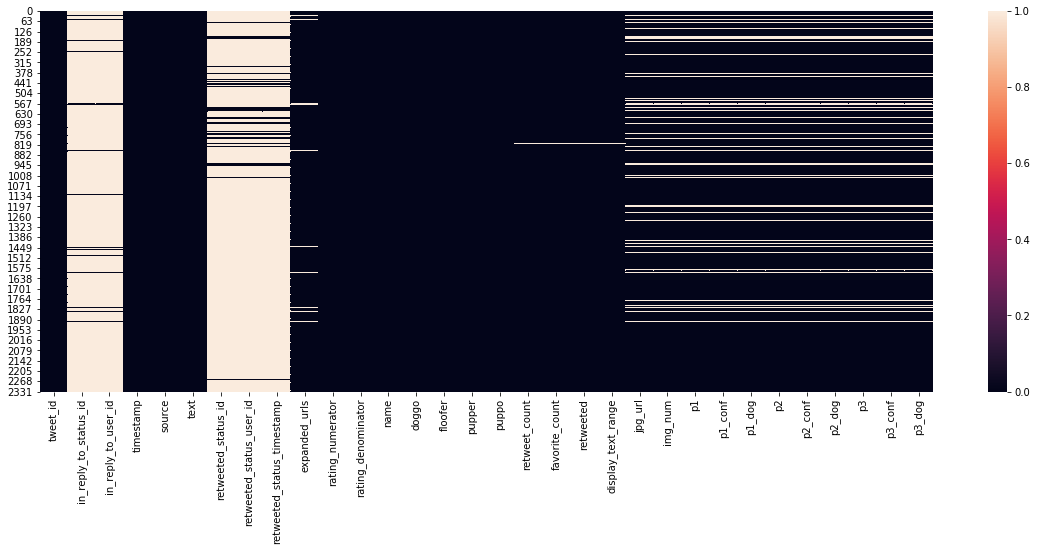

In [64]:
#Here is the results shows 
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_clean.isnull(), vmin = 0, vmax = 1)

In [65]:
#loading data
pd.set_option('display.max_colwidth', 30)
df_clean[df_clean["retweeted"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,retweeted,display_text_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.co...",RT @dog_rates: This is Can...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_ra...,13,10,Canela,None,None,None,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/medi...,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.co...",RT @katieornah: @dog_rates...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieo...,12,10,None,None,None,pupper,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/medi...,1.0,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False


##### Test

In [66]:
#we only want the rows without an entry in "retweeted_status_id" in our master dataframe
df_clean = df_clean[df_clean["retweeted_status_id"].isnull()]   

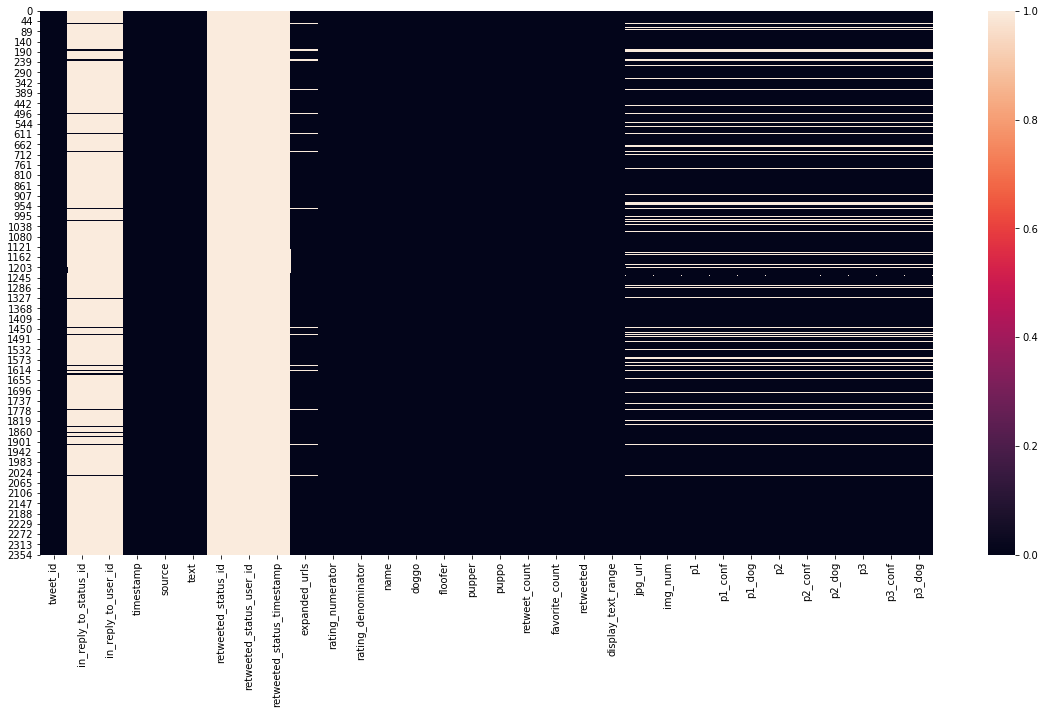

In [67]:
#here plot the heatmap ### test
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(df_clean.isnull(), vmin = 0, vmax = 1)

Here we can see that it's improve the data

#### Code

In [68]:
#clean the coluns from api table
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'retweeted', 'display_text_range',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Test

In [69]:
#check with the column from the api table, no retweets left
df_clean.retweeted.value_counts()

False    2175
Name: retweeted, dtype: int64

Here is the result

##### Code

In [70]:
#same as for the retweets, we only want the rows without an entry in "in_reply_to_status_id"
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]   

##### Test

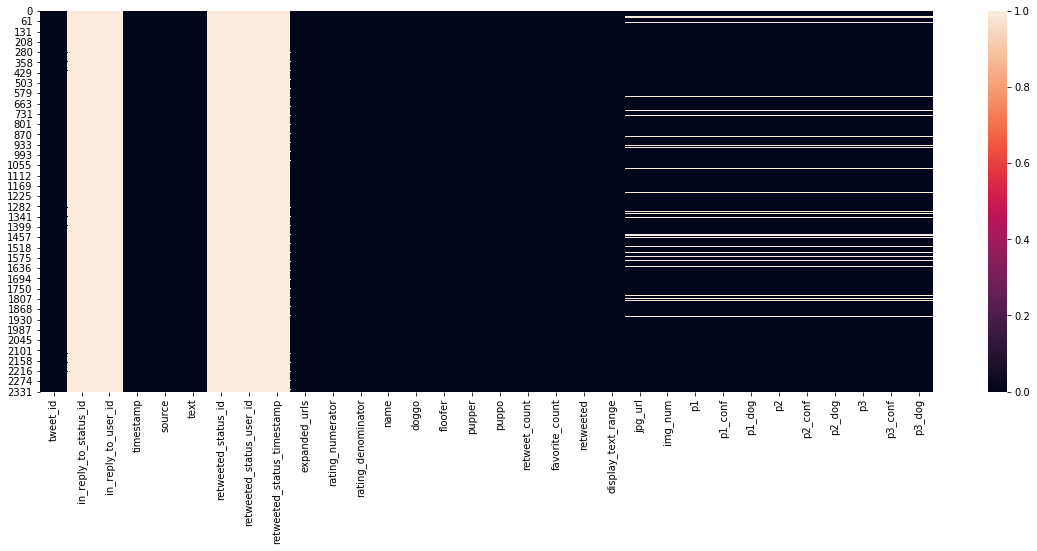

In [71]:
#Here is the plot heatmap
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_clean.isnull(), vmin = 0, vmax = 1)    

During the gathering process from the API there were some tweets, which got deleted by the account. We will also drop them out of our master dataframe.

#### Code

In [72]:
df_clean.dropna(subset = ["retweeted"], inplace = True)

In [73]:
#drop the unneeded columns
df_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp", "retweeted"], inplace=True, axis = 1)

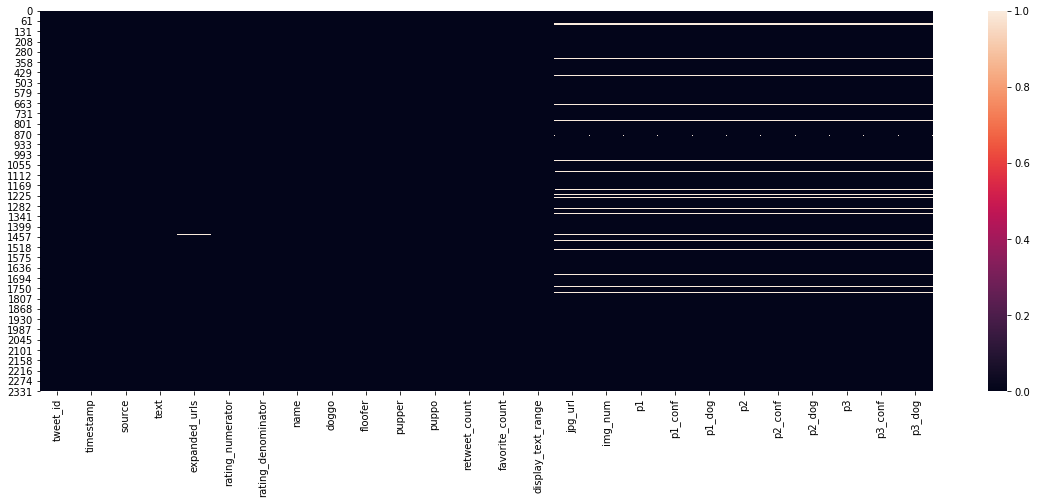

In [74]:
#plot heatmap
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_clean.isnull(), vmin = 0, vmax = 1)

Now we want to check the "jpg_url" column and drop all the rows, which are NAN - since these are the ones without an image. To check that, we could read in the image data from the gathered API data .

In [75]:
#Here is the load jpg_url
df_clean.dropna(subset = ["jpg_url"], inplace = True)

##### Test

In [76]:
#check if there are still duplicated images after dropping the replies and the retweets
sum(df_clean.jpg_url.duplicated())

0

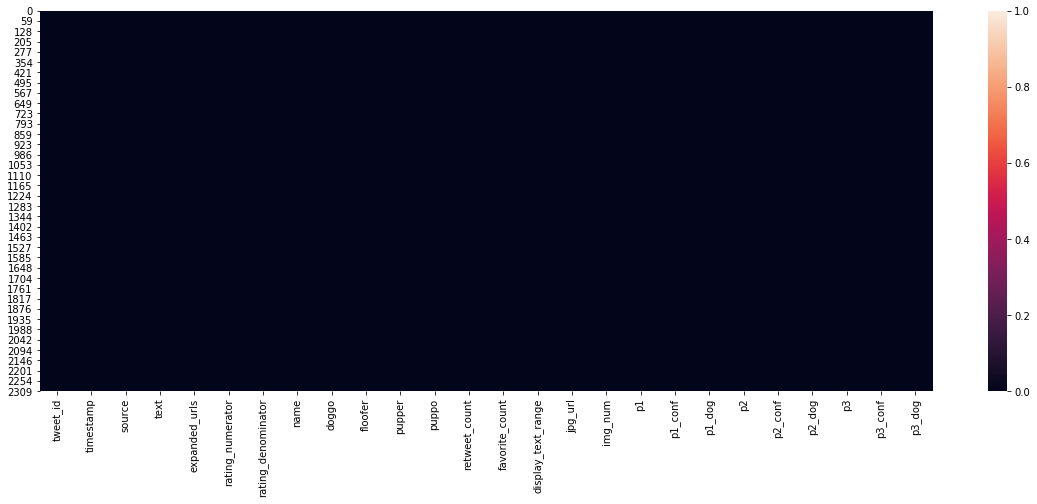

In [77]:
#plot jpg_url heatmap
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_clean.isnull(), vmin = 0, vmax = 1)

The last step here is to drop the rows which contain images

#### Code

In [78]:
df_clean.drop(df_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)


In [79]:
df_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Test

In [80]:
df_clean.info()
#Here we can see that the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
retweet_count         1666 non-null float64
favorite_count        1666 non-null float64
display_text_range    1666 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-n

##### Define
Clean the datatypes of the columns

#### Code

In [81]:
df_clean["tweet_id"] = df_clean["tweet_id"].astype("str")

In [82]:
#transform the timestamp to datetime
df_clean["timestamp"] = pd.to_datetime(df_clean.timestamp)

In [83]:
for x in ["retweet_count", "favorite_count", "img_num"]:
    df_clean[x] = df_clean[x].astype("int64")

#### Test

In [84]:
#it gives the information about clean data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns, UTC]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
display_text_range    1666 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    16

##### Clean the wrong numerators - the floats on the one hand, the ones with multiple occurence of the pattern 


###### Define
we found out, that floating numbers got transformed into integers, which lead to loss of information.

#### Code

In [85]:
df_twitter_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


Here we can see that many data is the float

In [86]:
pattern = "(\d+\.\d+\/\d+)"

df_clean.text.str.extract(pattern, expand = True)[0].dropna()

45       13.5/10
695      9.75/10
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [87]:
#get the right numerator out of the string
df_num_clean = df_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]

#### Test

In [88]:
#here is the clean data showing
df_num_clean

45       13.5
695      9.75
763     11.27
1712    11.26
Name: 0, dtype: object

In [89]:
#get the index of the wrong data     #### Code
df_num_clean_index = df_num_clean.index
df_num_clean_values = df_num_clean.values.astype("float64")

In [90]:
#transform the datatypes to float
df_clean.rating_numerator = df_clean.rating_numerator.astype("float64")
df_clean.rating_denominator = df_clean.rating_denominator.astype("float64")
#impute the data   ### Test
df_clean.loc[df_num_clean_index, "rating_numerator"] = df_num_clean_values
df_clean.loc[df_num_clean_index].rating_numerator  ### Test

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64


We also have the problem, that there can be multiple occurrences of the pattern. The reason for this is - most of the time - the display of two or more dogs in an image. For this cases we could add the ratings up, because the author of the Twitter account did this in one case that we found. Or we could build the average rating per each picture. For now, we are going to drop them out of the dataframe

### Code

In [91]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

print(df_clean.text.str.count(pattern)[df_clean.text.str.count(pattern) != 1])

#get the index of the rows which contains the pattern more than once
pattern_clean_index = df_clean.text.str.count(pattern)[df_clean.text.str.count(pattern) != 1].index

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


 we can easly see that the pattern 

#### Test

In [92]:
#load clean info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns, UTC]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
display_text_range    1666 non-null object
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                  

In [93]:
#no more occurrences of the mentioned problem are left
print(df_clean.text.str.count(pattern)[df_clean.text.str.count(pattern) != 1])

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


##### Define Extract the source from html code
###### Define
Use regular expression to extract only the href part of the link

In [94]:
df_clean.head() #result 
#read the data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.co...",This is Tilly. She's just ...,https://twitter.com/dog_ra...,13.0,10.0,Tilly,None,None,None,None,6514,33819,"[0, 138]",https://pbs.twimg.com/medi...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.co...",This is Archie. He is a ra...,https://twitter.com/dog_ra...,12.0,10.0,Archie,None,None,None,None,4328,25461,"[0, 121]",https://pbs.twimg.com/medi...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.co...",This is Darla. She commenc...,https://twitter.com/dog_ra...,13.0,10.0,Darla,None,None,None,None,8964,42908,"[0, 79]",https://pbs.twimg.com/medi...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.co...",This is Franklin. He would...,https://twitter.com/dog_ra...,12.0,10.0,Franklin,None,None,None,None,9774,41048,"[0, 138]",https://pbs.twimg.com/medi...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.co...",Here we have a majestic gr...,https://twitter.com/dog_ra...,13.0,10.0,None,None,None,None,None,3261,20562,"[0, 138]",https://pbs.twimg.com/medi...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


#### Code

In [95]:

df_clean.source = df_clean.source.str.extract("\>(.*?)\<", expand = True)

In [96]:
df_clean.iloc[:,:3].head()  ### Test
#iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

,tweet_id,timestamp,source
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone


#### Test

In [97]:
df_clean.source.value_counts()

Twitter for iPhone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

##### Define 
Split the text range into two separate columns

In [98]:
df_clean[["display_text_range"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 1 columns):
display_text_range    1666 non-null object
dtypes: object(1)
memory usage: 106.0+ KB


In [99]:
#range
df_clean.display_text_range[5]

[0, 138]

#### Code

In [100]:
#get the lower text range at list index 0
df_clean["lower_text_range"] = df_clean["display_text_range"].apply(lambda x: x[0])

#get the lower text range at list index 1
df_clean["upper_text_range"] = df_clean["display_text_range"].apply(lambda x: x[1])
df_clean.drop("display_text_range", axis = 1, inplace = True)

#### Test

In [101]:
#range lower txt range and upper txt range
df_clean[["lower_text_range", "upper_text_range"]].head()

,lower_text_range,upper_text_range
1,0,138
2,0,121
3,0,79
4,0,138
5,0,138


##### Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column
###### Define
Change the value of the column names mentioned above to be True or False

#### Code

In [102]:
#replace "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_clean[x].replace("None", "", inplace = True)

#https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
#concat the columns together
df_clean['dog_class'] = df_clean['doggo'].map(str) + df_clean[
    'floofer'].map(str) + df_clean['pupper'].map(str) + df_clean['puppo'].map(str)

#### Test

In [103]:
df_clean.dog_class.value_counts()

                1409
pupper           166
doggo             54
puppo             21
floofer            7
doggopupper        7
doggofloofer       1
doggopuppo         1
Name: dog_class, dtype: int64

In [104]:
#replace the leftover "" with np.nan
df_clean["dog_class"].replace("", np.nan, inplace = True)   ### Code

In [105]:
df_clean.dog_class.value_counts()    ### Test

pupper          166
doggo            54
puppo            21
floofer           7
doggopupper       7
doggofloofer      1
doggopuppo        1
Name: dog_class, dtype: int64

In [106]:
df_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    df_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
575     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

#### Code

In [107]:
df_clean["dog_class_re"] = df_clean.text.str.extract(
    r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True)

#### Test

In [108]:
#http://queirozf.com/entries/visualization-options-for-jupyter-notebooks
#show the full text
pd.set_option('display.max_colwidth', -1)

#find the differences of the extract
df_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

,text,dog_class,dog_class_re
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper,doggo


#### Code

In [109]:
#191 puppo
#200 floofer
#531 two dogs
#575 pupper
#889 two dogs
#956 not classified by author
#1063 two dogs
#1113 two dogs

df_clean.loc[191, "dog_class"] = "puppo"
df_clean.loc[200, "dog_class"] = "floofer"
df_clean.loc[531, "dog_class"] = np.nan
df_clean.loc[575, "dog_class"] = "pupper"
df_clean.loc[889, "dog_class"] = np.nan
df_clean.loc[956, "dog_class"] = np.nan
df_clean.loc[1063, "dog_class"] = np.nan
df_clean.loc[1113, "dog_class"] = np.nan

#### Test

In [110]:
#find the differences of the extract - worked
df_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

,text,dog_class,dog_class_re
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo


In [111]:
#drop the columns out    ### Code
df_clean.drop(["doggo", "floofer", "pupper", "puppo", "dog_class_re"], inplace = True, axis = 1)


In [112]:
#count the occurrences of the pattern and show the rows with count > 1     #### Test
df_clean[["text", "dog_class"]].loc[
    df_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
        df_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1].index]

,text,dog_class
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN
1304,"""I shall trip the big pupper with leash. Big pupper will never see it coming. I am a genius."" Both 11/10 https://t.co/uQsCJ8pf51",pupper
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,pupper
1367,"This is Sansa. She's gotten too big for her chair. Not so smol anymore. 11/10 once a pupper, always a pupper https://t.co/IpAoztle2s",pupper


it looks all is correct

##### Remove the wrong names of name column


###### Define
Replace 'a', 'an', 'the' to nan

##### Code

In [113]:
for x in ["None", "a", "by", "the"]:
    df_clean["name"].replace(x, np.nan, inplace = True)

In [114]:
df_clean.name.value_counts()

Cooper      10
Charlie     10
Lucy        10
Tucker      9 
Oliver      9 
           .. 
Chompsky    1 
Newt        1 
Pubert      1 
Edmund      1 
Jazz        1 
Name: name, Length: 848, dtype: int64

##### Test

In [115]:
#load data
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_class
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0,138,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0,121,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,79,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,138,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0,138,NaN


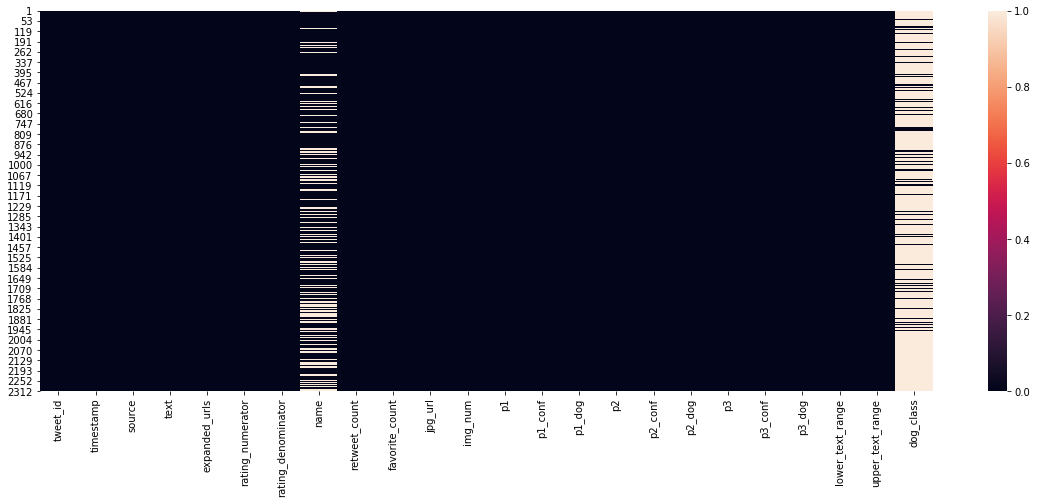

In [116]:
#plot heatmap
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_clean.isnull(), vmin = 0, vmax = 1)

In [117]:
df_clean.info()  ### Result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 24 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns, UTC]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1213 non-null object
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null object
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog            

#### Reduce the prediction columns into two - breed and conf

###### Define
Put the p1_dog, p2_dog, p3_dog in separate table called prediction_is_dog_clean with columns prediction and is_dog. After that, remove the p1_dog, p2_dog, p3_dog from the image_predictions data

##### Code

In [118]:
df_clean.query("p2_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_class


In [119]:
df_clean.query("p3_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_class


In [120]:
df_clean.query("p3_conf > p2_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_class


In [121]:
#extract the most likely prediction which is a dog
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_clean["breed"] = df_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_clean["conf"] = df_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [122]:
df_clean.iloc[:, 12:]
#iloc gets rows (or columns) at particular positions in the index (so it only takes integers

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,lower_text_range,upper_text_range,dog_class,breed,conf
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0,138,NaN,Chihuahua,0.323581
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0,121,NaN,Chihuahua,0.716012
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,79,NaN,Labrador_retriever,0.168086
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,138,NaN,basset,0.555712
5,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0,138,NaN,Chesapeake_Bay_retriever,0.425595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0,120,NaN,miniature_pinscher,0.560311
2352,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0,137,NaN,Rhodesian_ridgeback,0.408143
2353,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0,130,NaN,German_shepherd,0.596461
2354,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0,139,NaN,redbone,0.506826


In [123]:
#drop the reduced columns
df_clean.drop(df_clean.columns[12:21], inplace = True, axis = 1)

#### Test

In [124]:
#load data
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_class,breed,conf
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0,138,NaN,Chesapeake_Bay_retriever,0.425595


##### Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase

 ###### Define
 reduced column, we have to clean it for consistency.

#### Code

In [125]:
#replace "_" with " "
df_clean.breed = df_clean.breed.str.replace("_", " ")

#### Test

In [126]:
#Here clean data and replace columns
df_clean.breed # dogs breed shows the results

1       Chihuahua               
2       Chihuahua               
3       Labrador retriever      
4       basset                  
5       Chesapeake Bay retriever
                  ...           
2351    miniature pinscher      
2352    Rhodesian ridgeback     
2353    German shepherd         
2354    redbone                 
2355    Welsh springer spaniel  
Name: breed, Length: 1666, dtype: object

#### Code

In [127]:
#lower the strings
df_clean.breed = df_clean.breed.str.lower()

#### Test

In [128]:
df_clean.breed.value_counts().head(10)

golden retriever      156
labrador retriever    106
pembroke              94 
chihuahua             90 
pug                   62 
toy poodle            50 
chow                  48 
samoyed               42 
pomeranian            41 
malamute              33 
Name: breed, dtype: int64

#### Code

In [129]:
#reset index to match with the real amount of rows
df_clean.reset_index(drop = True, inplace = True)

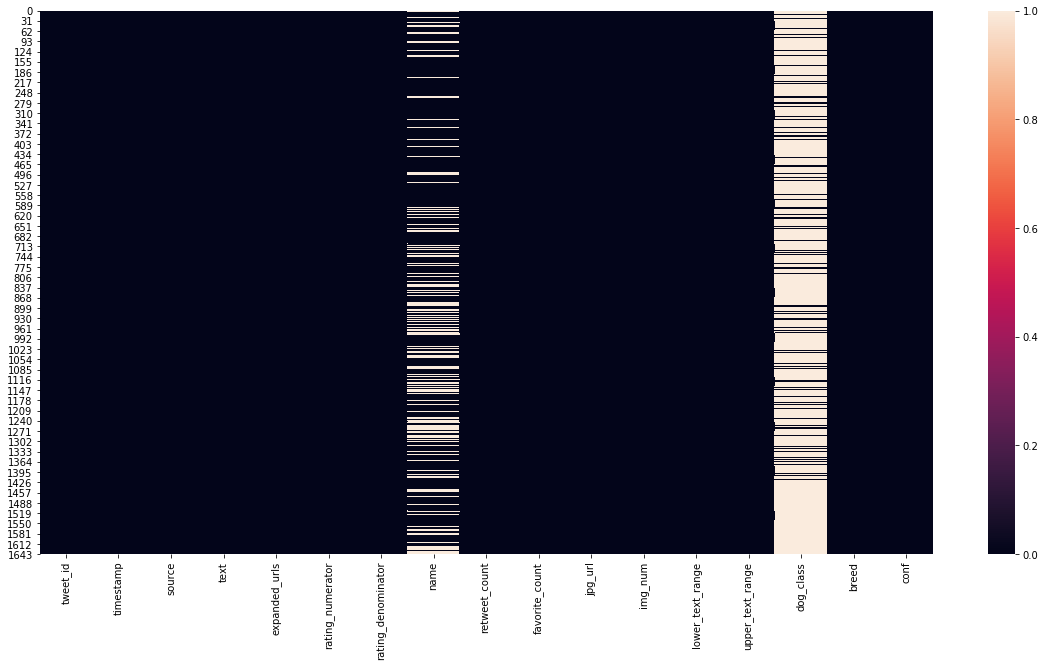

In [130]:
#plot heatmap and replaced "_"
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(df_clean.isnull(), vmin = 0, vmax = 1)

#### Test

In [131]:
#here clean data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 17 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns, UTC]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1213 non-null object
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null int64
lower_text_range      1666 non-null int64
upper_text_range      1666 non-null int64
dog_class             252 non-null object
breed                 1666 non-null object
conf                  1666 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(5), object(8)
memory usage: 221.4+ KB


In [132]:
#Here shows data 'breed' and 'conf'
df_clean[["breed", "conf"]].head()

,breed,conf
0,chihuahua,0.323581
1,chihuahua,0.716012
2,labrador retriever,0.168086
3,basset,0.555712
4,chesapeake bay retriever,0.425595


In [133]:
#save the data to a *.csv file
df_clean.to_csv('twitter_archive_master.csv', index = False)


### Data Analysis

###### Questions:

>Which breed gets retweeted and favorited the most overall?

>What is the most popular name for the dog in the tweet data?

>Number of tweets, retweets, favorites, image number and length of the tweets?

>How good is the image prediction?

>Is there a pattern visible in the timing of the tweets?





#####  Which breed gets retweeted and favorited the most overall?

 we will first take a look on the frequency of the breed occurence and afterwards we will create a groupby object to sum up the favorite and retweet count of each breed in this dataset.

In [134]:
#read in the master csv
df = pd.read_csv("twitter_archive_master.csv")

In [135]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,lower_text_range,upper_text_range,dog_class,breed,conf
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0,138,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0,121,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0,79,NaN,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0,138,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0,138,NaN,chesapeake bay retriever,0.425595


In [136]:
#define columns
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'lower_text_range',
       'upper_text_range', 'dog_class', 'breed', 'conf'],
      dtype='object')

### Most popular dogs

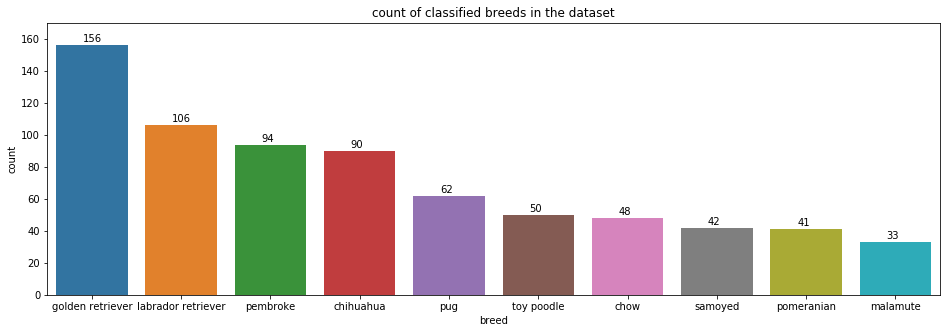

In [137]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "breed", data = df, order=df.breed.value_counts().iloc[:10].index )
ax.set_title("count of classified breeds in the dataset");

ax.set_ylim(0, 170)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

Here we can check that displayed in the images are mostly golden retrievers with a count of 154 and 2nd place is labrador retrievers with a count of 105

In [138]:
df_breed_group = df[["retweet_count", "favorite_count", "breed"]].groupby("breed", as_index = False).sum()

In [139]:
df_breed_group.sort_values("retweet_count", ascending = False).head(10)

,breed,retweet_count,favorite_count
45,golden retriever,586657,1943782
62,labrador retriever,405404,1265355
80,pembroke,291771,1038797
27,chihuahua,250722,743689
88,samoyed,203446,583906
41,french bulldog,156230,570921
30,cocker spaniel,145743,407412
28,chow,131025,446933
82,pug,118682,383817
103,toy poodle,115330,337270


In [140]:
df_breed_group.sort_values("favorite_count", ascending = False).head(10)


,breed,retweet_count,favorite_count
45,golden retriever,586657,1943782
62,labrador retriever,405404,1265355
80,pembroke,291771,1038797
27,chihuahua,250722,743689
88,samoyed,203446,583906
41,french bulldog,156230,570921
28,chow,131025,446933
30,cocker spaniel,145743,407412
82,pug,118682,383817
103,toy poodle,115330,337270


The golden retriever and the labrador retriever therefore also lead the list of most favorite and retweets.

In [141]:
df_breed_group["sum"] = df_breed_group["retweet_count"] + df_breed_group["favorite_count"]

In [142]:
df_breed_group.sort_values("sum", ascending = False).head(10)


,breed,retweet_count,favorite_count,sum
45,golden retriever,586657,1943782,2530439
62,labrador retriever,405404,1265355,1670759
80,pembroke,291771,1038797,1330568
27,chihuahua,250722,743689,994411
88,samoyed,203446,583906,787352
41,french bulldog,156230,570921,727151
28,chow,131025,446933,577958
30,cocker spaniel,145743,407412,553155
82,pug,118682,383817,502499
103,toy poodle,115330,337270,452600


### Is there a relation between favorite count and retweet count?

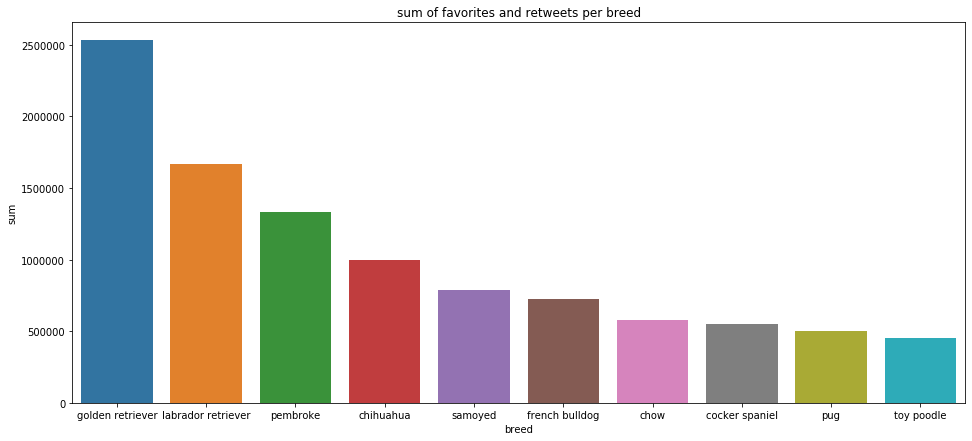

In [143]:
#visualization
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = "breed", y = "sum", data = df_breed_group.sort_values("sum", ascending=False).iloc[:10])
ax.set_title("sum of favorites and retweets per breed");

In [144]:
df[["retweet_count", "favorite_count", "breed"]].sort_values("retweet_count", ascending = False).head(10)

,retweet_count,favorite_count,breed
686,79515,131075,labrador retriever
360,56625,107015,chihuahua
714,52360,75163,eskimo dog
275,48265,132810,lakeland terrier
53,45849,107956,english springer
296,42228,95450,standard poodle
362,37911,75639,cocker spaniel
100,32883,106827,french bulldog
1281,31989,67100,whippet
302,31314,57622,cocker spaniel


In [145]:
df[["retweet_count", "favorite_count", "breed"]].sort_values("favorite_count", ascending = False).head(10)

,retweet_count,favorite_count,breed
275,48265,132810,lakeland terrier
686,79515,131075,labrador retriever
53,45849,107956,english springer
360,56625,107015,chihuahua
100,32883,106827,french bulldog
296,42228,95450,standard poodle
86,27680,85011,golden retriever
362,37911,75639,cocker spaniel
121,25661,75193,malamute
714,52360,75163,eskimo dog


We can see that the most liked and retweeted tweet is the labrador retriever, with golden retrievers not even being in the list. Let's see if there are big differences in the average rating.

In [146]:
df_breed_group_mean = df[["rating_numerator", "breed"]].groupby("breed", as_index = False).mean()

### Does @weRateDogs tweets more dog rating as it gains popularity?

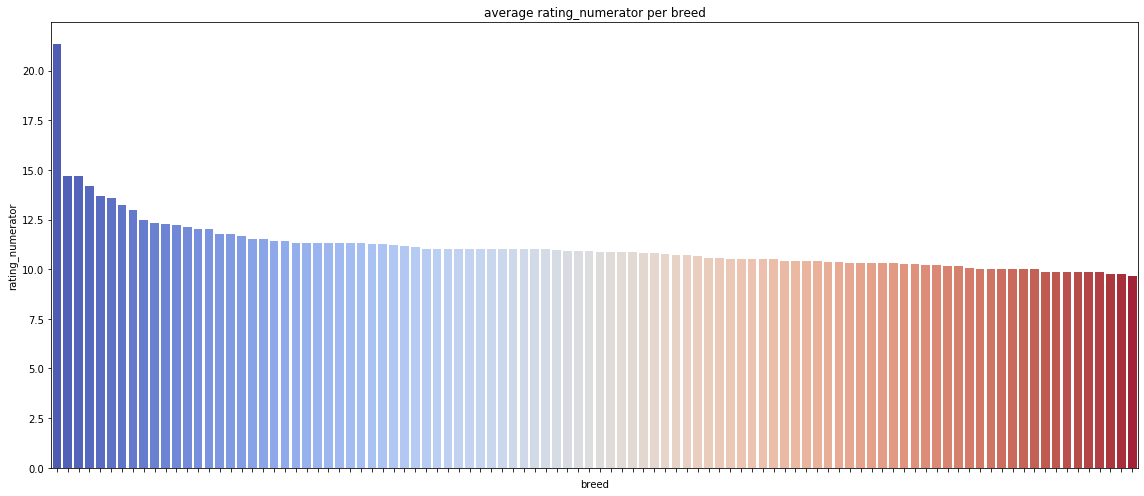

In [147]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = "breed", y = "rating_numerator", data = df_breed_group_mean.sort_values("rating_numerator", ascending = False).iloc[:100], palette = "coolwarm")
ax.set_title("average rating_numerator per breed");

ax.xaxis.set_ticklabels([])
plt.tight_layout()

While the most breeds are on average on nearly the same level of rating, there is some outlier visible.

In [148]:
df_breed_group_mean.sort_values("rating_numerator", ascending = False).head(10)


,breed,rating_numerator
96,soft-coated wheaten terrier,21.357143
109,west highland white terrier,14.687500
48,great pyrenees,14.666667
28,chow,14.166667
62,labrador retriever,13.688679
16,borzoi,13.600000
94,siberian husky,13.250000
18,bouvier des flandres,13.000000
87,saluki,12.500000
21,briard,12.333333


In [149]:
df[["breed", "rating_numerator"]].sort_values("rating_numerator", ascending = False).head(5)


,breed,rating_numerator
589,labrador retriever,165.0
1241,chow,144.0
1133,soft-coated wheaten terrier,121.0
835,golden retriever,99.0
1290,labrador retriever,88.0


In [150]:
len(df.query("breed == 'labrador retriever'"))


106

In [151]:
len(df.query("breed == 'soft-coated wheaten terrier'"))


14

In [152]:
df.query("breed != 'soft-coated wheaten terrier'").rating_numerator.mean()


11.251077481840193

The soft-coated wheaten terrier got a very high mean rating. In fact, the labrador retriever got overall the biggest rating with 165, but since there are a lot more tweets with labrador retriever than for the soft-coated wheaten terrier, the one big rating of the soft-coated wheaten terrier has a higher weight then the one of the labrador retriever (14 tweets of soft-coated wheaten terrier and 105 of labrador retriever).

Not taking the outlier into account, this leads us to an average rating of 11. Based on the number of posts, retweets, favorites and mean rating, we will give the title of "Most overall liked dog of this Twitter account and its community" to the labrador retriever.

#####  number of tweets, retweets, favorites  and length of the tweets ?

To answer this question we first have to extract time information out of the timestamp.



In [153]:
#Here define time
df_time = df.copy()

In [154]:
#load info
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 17 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1213 non-null object
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null int64
lower_text_range      1666 non-null int64
upper_text_range      1666 non-null int64
dog_class             252 non-null object
breed                 1666 non-null object
conf                  1666 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 221.4+ KB


The timestamp is a string again, so I have to transform it again.



In [155]:
df_time.timestamp = pd.to_datetime(df_time.timestamp)


In [156]:
df_time["dow"] = df_time["timestamp"].apply(lambda x: x.dayofweek)
#here check data from 1st day to week

### How about the retweet count and the favorite count per week?

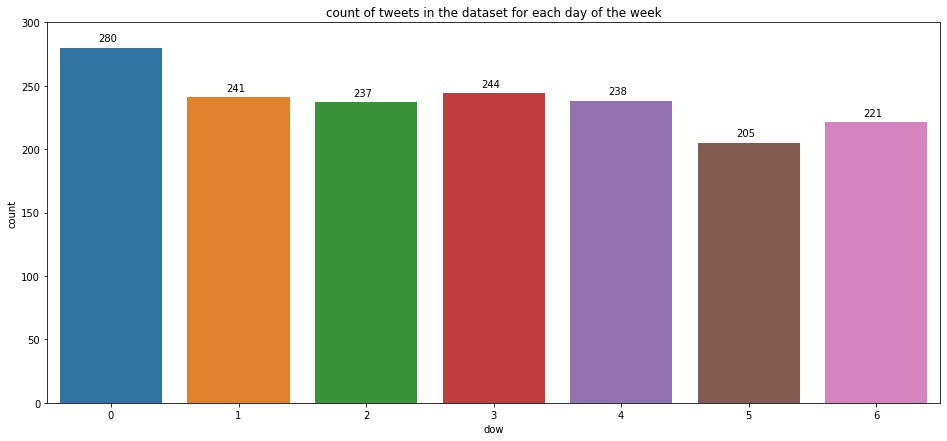

In [157]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.countplot(x = "dow", data = df_time)
ax.set_title("count of tweets in the dataset for each day of the week");

ax.set_ylim(0, 300)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

We can see that most of the tweets are posted on monday. For tuesday to friday it is nearly the same number of posts. On the weekend the Twitter profile tweets a little bit less.

In [158]:
df_time.timestamp.min()


Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [159]:
df_time.timestamp.max()

Timestamp('2017-08-01 00:17:27+0000', tz='UTC')

This dataset contains data from the end of 2015 to the August of 2017. Let's extract the month, year and hour information from the timestamp.

In [160]:
#get the month out of the timestamp
df_time["month"] = df_time["timestamp"].apply(lambda x: x.month)
#get the year out of the timestamp
df_time["year"] = df_time["timestamp"].apply(lambda x: x.year)
#get the hour out of the timestamp
df_time["hour"] = df_time["timestamp"].apply(lambda x: x.hour)

### How about the retweet count and the favorite count per month?

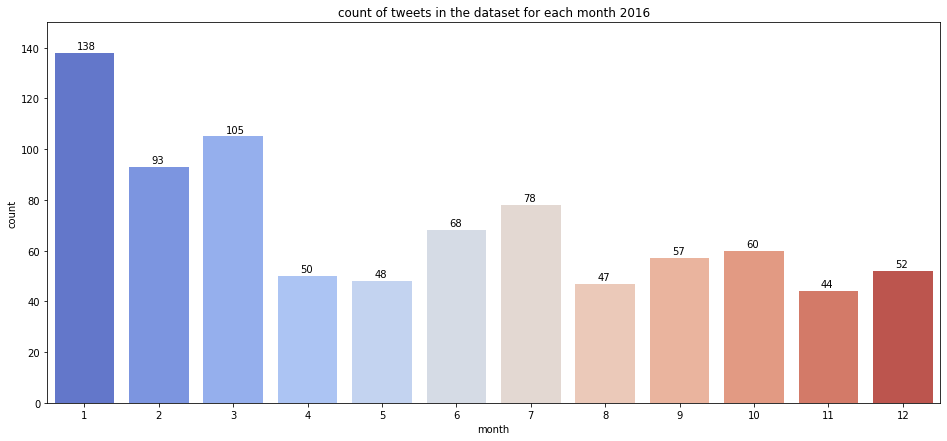

In [161]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.countplot(x = "month", data = df_time.query("year == 2016"),palette='coolwarm')
ax.set_title("count of tweets in the dataset for each month 2016");

ax.set_ylim(0,150)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.5))


Over the timeperiod of 2016 the number of post per months decreased. It went from 134 tweets in January to 52 in December. Does this mean, that the performance of this account is also decreasing?

### How about the retweet count and the favorite count per year?


In [162]:
#create a timestamp containing month and year
df_time['month_year'] = pd.to_datetime(df["timestamp"]).dt.to_period('M')

C:\Users\Akash Yadav\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


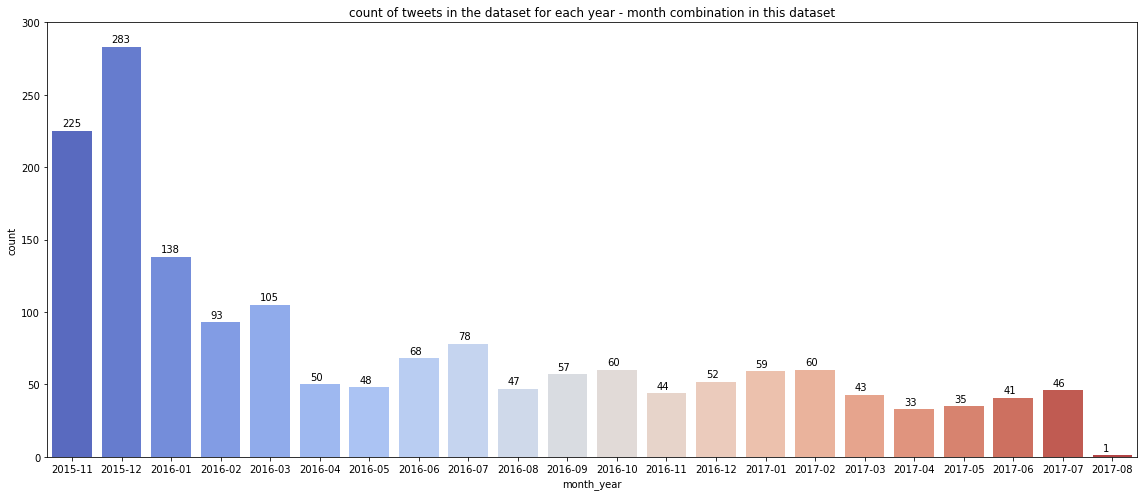

In [163]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.countplot(x = "month_year", data = df_time.sort_values("month_year"),palette = "coolwarm" )
ax.set_title("count of tweets in the dataset for each year - month combination in this dataset");

ax.set_ylim(0, 300)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))

plt.tight_layout()


If we look at it over the whole timeperiod it becomes even more clear. In April 2016 the number of tweets dropped and since then it has a relatively stable level. To see if the performance of the Account decreased we will take a look on the favorites and retweets that the posts get.

In [164]:
#create a groupby object over the sum
df_time_groupby = df_time.groupby("month_year", as_index = False).sum()

In [165]:
#load data according to groupby
df_time_groupby.head()

,month_year,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,lower_text_range,upper_text_range,conf,dow,month,year,hour
0,2015-11,1.504399e+20,2117.00,2242.0,108323.0,266213.0,228.0,0.0,27223.0,109.435099,656.0,2475.0,453375.0,1910.0
1,2015-12,1.913382e+20,3049.26,3010.0,454734.0,1056588.0,308.0,0.0,32041.0,149.269124,802.0,3396.0,570245.0,2574.0
2,2016-01,9.494340e+19,1538.00,1481.0,195213.0,524595.0,156.0,0.0,16117.0,73.421154,428.0,138.0,278208.0,1122.0
3,2016-02,6.502689e+19,1052.00,1000.0,130677.0,367080.0,110.0,0.0,10671.0,50.717989,261.0,186.0,187488.0,762.0
4,2016-03,7.448264e+19,1308.00,1240.0,160989.0,467879.0,124.0,0.0,12425.0,62.914899,310.0,315.0,211680.0,890.0


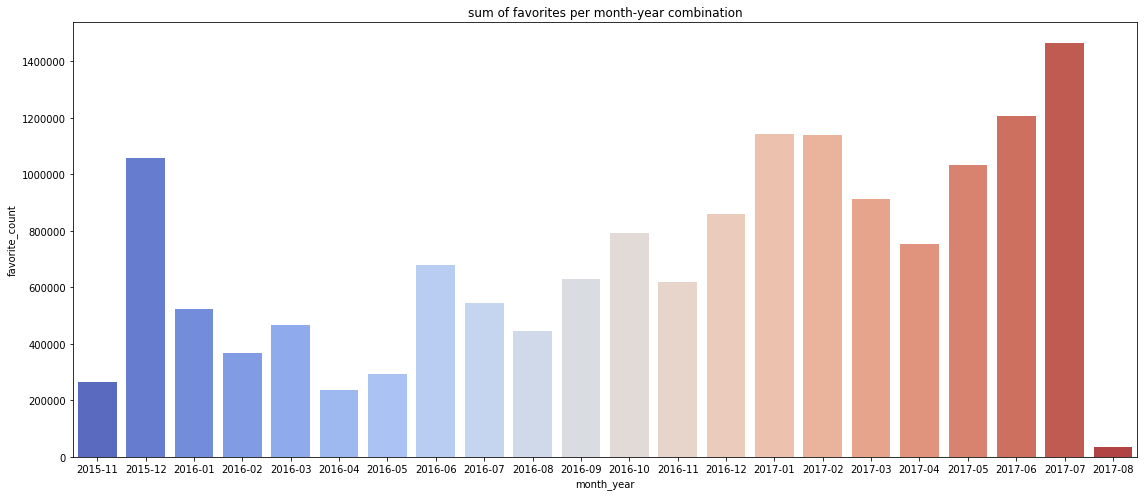

In [166]:

fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = "month_year", y = "favorite_count", data = df_time_groupby,palette='coolwarm')
ax.set_title("sum of favorites per month-year combination");
plt.tight_layout()

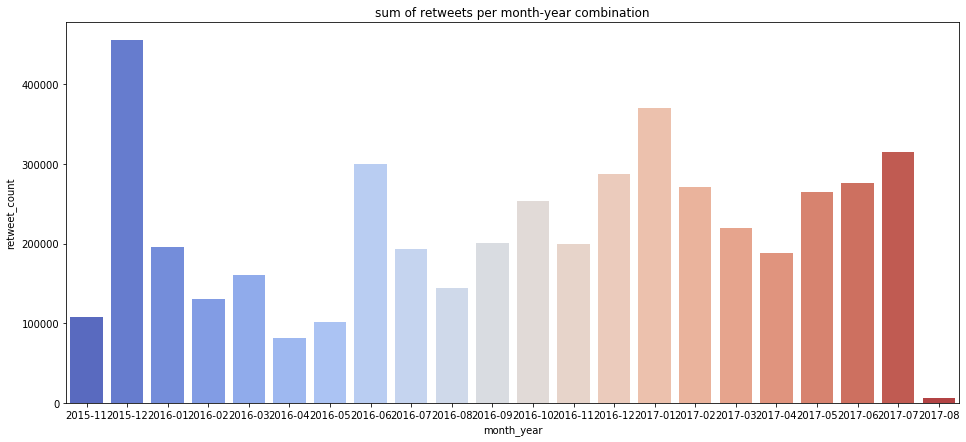

In [167]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = "month_year", y = "retweet_count", data = df_time_groupby,palette='coolwarm')
ax.set_title("sum of retweets per month-year combination");

Interesting, while the number of tweets per month is decreasing, the favorites and retweets per month are increasing.



In [168]:
#create a groupby object over the mean
df_time_groupby_mean = df_time.groupby("month_year", as_index = False).mean()

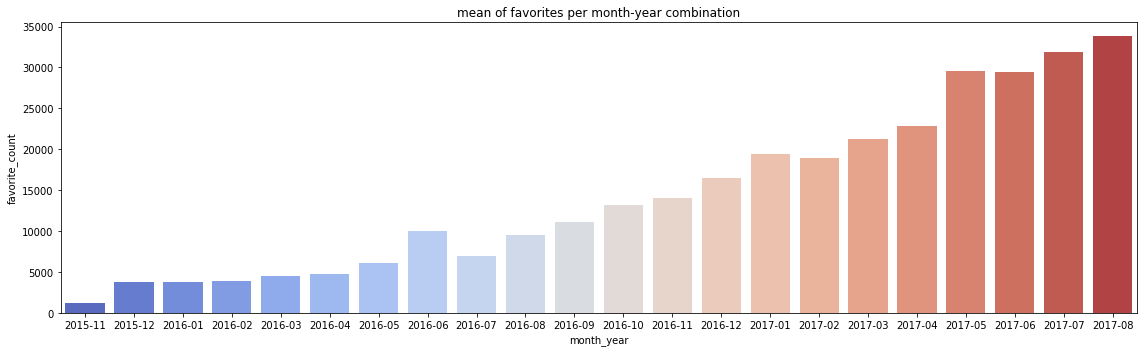

In [169]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "favorite_count", data = df_time_groupby_mean,palette='coolwarm')
ax.set_title("mean of favorites per month-year combination");
plt.tight_layout()

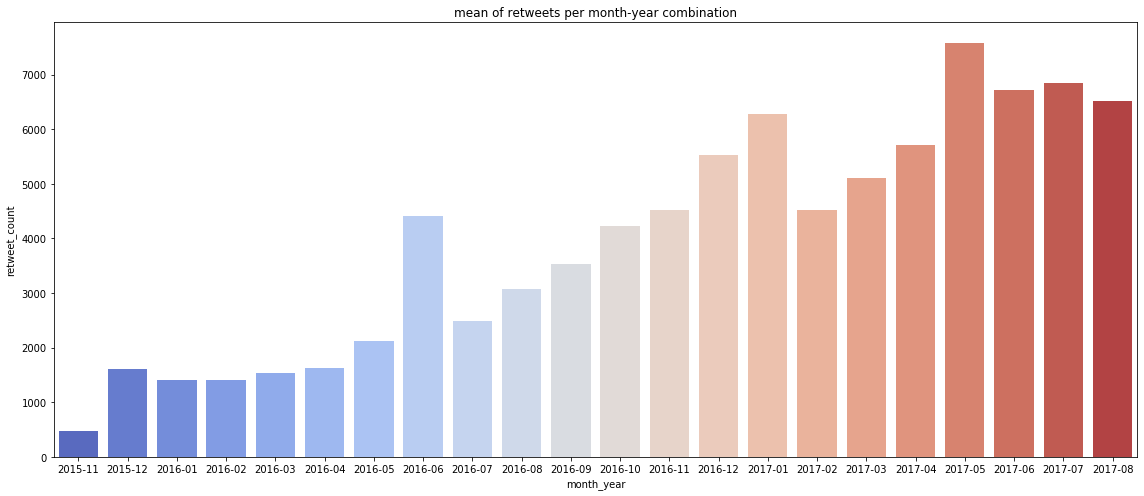

In [170]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = "month_year", y = "retweet_count", data = df_time_groupby_mean,palette='coolwarm')
ax.set_title("mean of retweets per month-year combination");
plt.tight_layout()

If we look at the average number of favorites and retweets the clear uptrend gets even more clearclearer! Now let's see if the number of posted images per month or the average upper text range changed over time.

### How good is the image prediction?

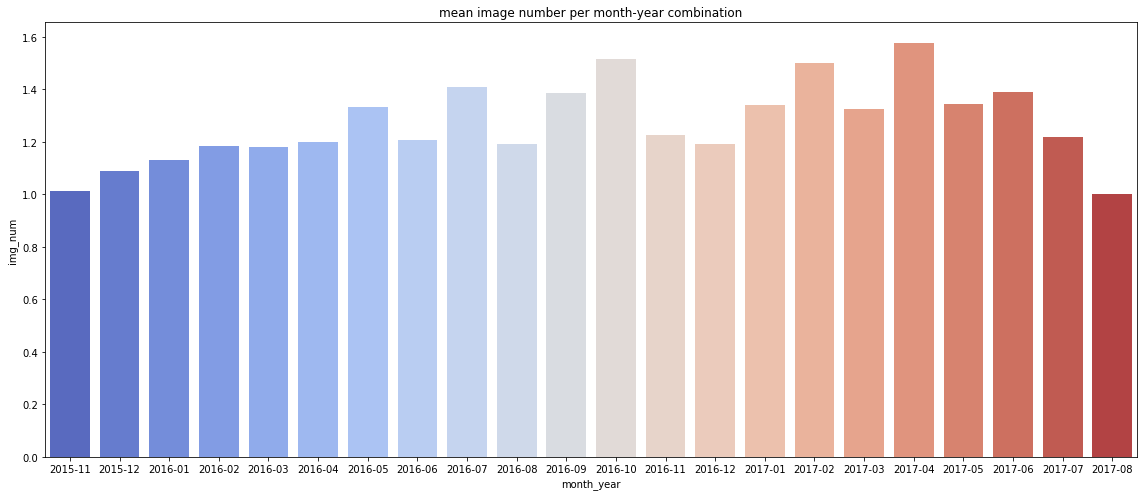

In [171]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = "month_year", y = "img_num", data = df_time_groupby_mean,palette='coolwarm')
ax.set_title("mean image number per month-year combination" );
plt.tight_layout()

For the images it seems pretty stable. There are months where are more and months where are less posted images, but overall there is no clean up- or downtrend visible.

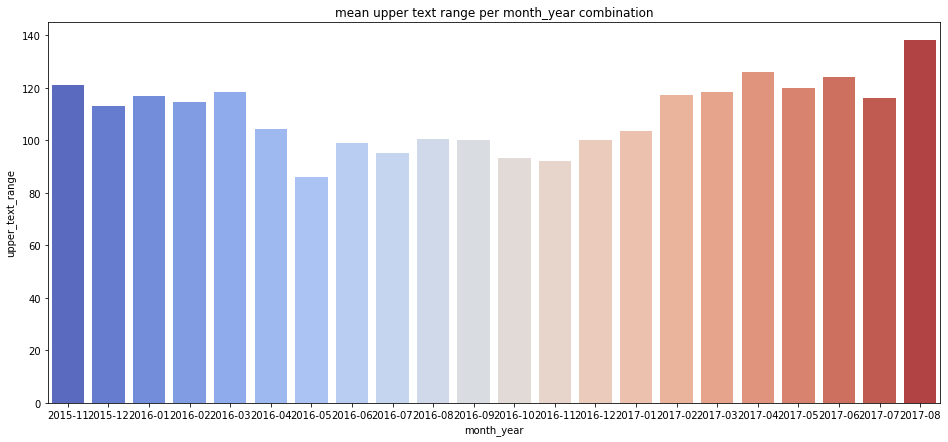

In [172]:
fig, ax = plt.subplots(figsize = (16,7))
ax = sns.barplot(x = "month_year", y = "upper_text_range", data = df_time_groupby_mean ,palette='coolwarm')
ax.set_title("mean upper text range per month_year combination");

In [173]:
#create a groupby object over the mean
df_time_groupby_mean.upper_text_range.mean()

109.91222730196418

In [174]:
df_time_groupby_mean.iloc[:11].upper_text_range.mean()

106.28787979625427

In [175]:
df_time_groupby_mean.iloc[11:].upper_text_range.mean()

113.5365748076741

For the tweet length it seems like it increased over the second half of this dataset from an average of 106 to 113.

### Is there a pattern visible in the timing of the tweets?

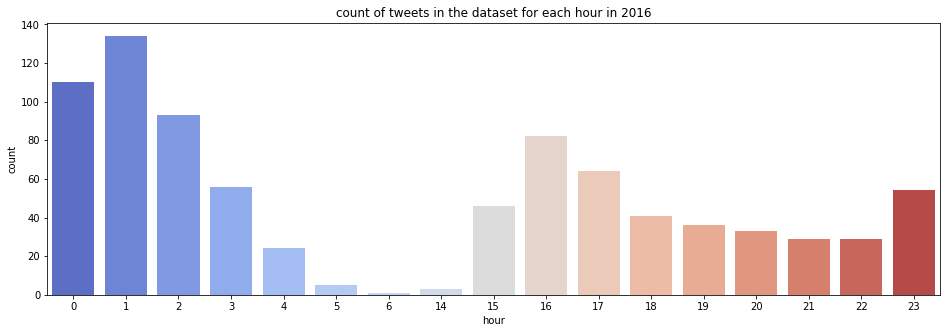

In [176]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2016"), palette = "coolwarm")
ax.set_title("count of tweets in the dataset for each hour in 2016");

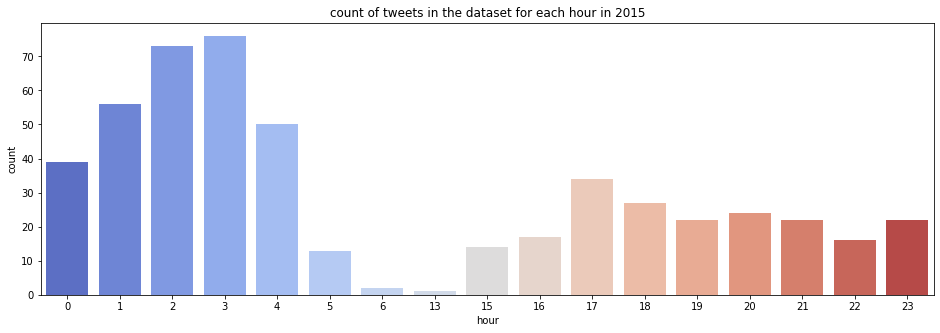

In [177]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "hour", data = df_time.query("year == 2015"), palette = "coolwarm")
ax.set_title("count of tweets in the dataset for each hour in 2015");


## Summary and Conclusions

In this project we went through a whole data wrangling process. The gathering included the programmatical, manual download as also the gathering via an API. Also the cleaning part covered a lot of techniques like regular expressions or the overall handling of dataframes.

##### In the analysis we took a look at following questions:


>Based on the predicted, most likely dog breed: Which breed gets retweeted and favorited the most overall?

>The winner for our analysis was the labrador retriever.

>How did the account develop (speaking about number of tweets, retweets, favorites, image number and length of the tweets)?

>We found, that the number of tweets per month decreased, while the retweets and favorites show an uptrend. For the image numbers there is no clear trend visible, the length of the tweets got a little bit closer to the maximum of 130 in the second half of the dataset.